### Setup for AeroCom users database ([aerocom-users.met.no](https://wiki.met.no/aerocom/data_retrieval))

#### IMPORTANT REMARK

The users database does not contain observation data but only model output (and some satellites). Many of the tutorial notebooks will therefore not work when being connected to the user server.

#### Getting access to the user-server

Please follow the [instructions provided here](https://wiki.met.no/aerocom/data_retrieval). After you have tested your access as described in the link, the easiest way to set it up for pyaerocom is by mounting the remote user-server into a local directory of your choice.

Here, the AEROCOM user-server (that is, the directory ***/metno/aerocom-users-database/*** on the ***aerocom-users.met.no***) is mounted to the following location:

In [1]:
import os
HOME = os.path.expanduser('~') + '/'

DATA_DIR = HOME + 'aerocom-users-database/'
os.listdir(DATA_DIR)

['AEROCOM_EMISSIONS',
 'AEROCOM-PHASE-II-IND2',
 'EURODELTA',
 'AEROCOM-PHASE-III',
 'AEROCOM-PHASE-III-Trend',
 'CMIP6',
 'HTAP-PHASE-II',
 'AEROCOM-PHASE-II',
 'AEROCOM-PHASE-II-IND3',
 'AEROCOM-PHASE-III-CTRL2018',
 'SATELLITE-DATA',
 'AEROCOM-PHASE-III-2019',
 'HTAP-PHASE-I',
 'AEROCOM-PHASE-I',
 'AMAP',
 'ACCMIP',
 'AEROCOM-PHASE-I-IND',
 'AEROCOM-PHASE-II-PRESCRIBED-2013',
 'BACCHUS',
 'C3S-Aerosol',
 'ECMWF',
 'ECLIPSE',
 'CCI-Aerosol']

If you have mounted correctly, this should output a list of data directories as found in the corresponding directory on the server.

##### NOTE

Currently, the user-server does not include any ungridded data (e.g. from Aeronet or EBAS networks).

#### Preparing pyaerocom

In [2]:
import pyaerocom as pya
pya.__version__ # NEEDS to be >= 0.7.0

Initating pyaerocom configuration
Checking database access...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.019 s


'0.8.0.dev30'

**Note**: The import of pyaerocom will not output *Init data paths for lustre* if you are not working at METNo (or if you do but you do not have *lustre* mounted at your root). This is because the METNo internal database structure for AEROCOM data will only be loaded and initiated if access to this database can actually be established. 

##### Updating the base directory

Change the data base directory to the mounted subdirectory *aerocom-users-database* and it will automatically recognise the corresponding sub-directory structure for you.

In [3]:
pya.const.BASEDIR = DATA_DIR

Initiating directories for AEROCOM users database


You should see the output message ``Initiating directories for AEROCOM users database`` when doing this. If you do not, something may be wrong with you mount or you have an outdated version of *pyaerocom* (you need at least version 0.7.0) for this to work.

#### Now you are ready to go

You can start with searching the database for a model (or satellite) of you interest.

In [4]:
pya.browse_database('ECMWF*')

Found more than 20 matches for input pattern ECMWF*:

Matches: ['ECMWF_H29D', 'ECMWF_GEUH', 'ECMWF_GBST', 'ECMWF_EAC3_CLIM', 'ECMWF_EZUB', 'ECMWF_GZHY_96h', 'ECMWF_GKVV_96h', 'ECMWF_FI8E', 'ECMWF_FGKY', 'ECMWF_FBOVclim', 'ECMWF_FBOV_1x1', 'ECMWF_H293', 'ECMWF_FWU0_96h', 'ECMWF_H30X', 'ECMWF_GTYL', 'ECMWF_GNHB_96h', 'ECMWF_G1UT', 'ECMWF_FLV2', 'ECMWF_CNTRL_96h', 'ECMWF_G1WY', 'ECMWF_G4E2test', 'ECMWF_0001_12Z', 'ECMWF_CAMS_REAN', 'ECMWF_GQK3', 'ECMWF_GU42', 'ECMWF_GN29', 'ECMWF_GSYG_96h', 'ECMWF_FZPR', 'ECMWF_FJ6U', 'ECMWF_GJJH_96h', 'ECMWF_FNYP_96h', 'ECMWF_0001_12Z_96h', 'ECMWF_F93I_96h', 'ECMWF_GKVV', 'ECMWF_FO4R', 'ECMWF_EYIM', 'ECMWF_EAC4', 'ECMWF_G148', 'ECMWF_FSZD', 'ECMWF_GNAR', 'ECMWF_OSUITE_12Z', 'ECMWF_FTKI', 'ECMWF_OSUITE-NOSS', 'ECMWF_G4E2_96h', 'ECMWF_G4O2', 'ECMWF_GU42_96h', 'ECMWF_GZNU', 'ECMWF_ESUITE_0067_96h', 'ECMWF_H4X1', 'ECMWF_EXLZ', 'ECMWF_H4X1_T511', 'ECMWF_H1IN', 'ECMWF_GEUH_96h', 'ECMWF_GAEN', 'ECMWF_0001_96h', 'ECMWF_FBOV', 'ECMWF_FWU0', 'ECMWF_G2AA', 'ECMWF_G

Reading of ECMWF IFS reanalysis data.

In [5]:
gridded_reader = pya.io.ReadGridded('ECMWF_CAMS_REAN')
print(gridded_reader)


Pyaerocom ReadGridded
---------------------
Data ID: ECMWF_CAMS_REAN
Data directory: /home/jonasg/aerocom-users-database//ECMWF/ECMWF_CAMS_REAN/renamed
Available experiments: ['', 'REAN']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 9999]
Available frequencies ['daily' 'monthly']
Available variables: ['ang4487aer', 'bscatc532aerboa', 'bscatc532aertoa', 'ec532aer', 'ec532dryaer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer', 'sconcbc', 'sconcdust', 'sconcoa', 'sconcpm10', 'sconcpm25', 'sconcso4', 'sconcss', 'time', 'z']


In [6]:
od550aer = gridded_reader.read_var(var_name='od550aer', ts_type='monthly')
print(od550aer)

pyaerocom.GriddedData: ECMWF_CAMS_REAN
Grid data: Aerosol optical depth at 550 nm / (1) (time: 60; latitude: 161; longitude: 320)
     Dimension coordinates:
          time                             x             -               -
          latitude                         -             x               -
          longitude                        -             -               x
     Attributes:
          Conventions: CF-1.6
          NCO: "4.5.4"
          computed: False
          concatenated: True
          data_id: ECMWF_CAMS_REAN
          from_files: ['/home/jonasg/aerocom-users-database//ECMWF/ECMWF_CAMS_REAN/renamed/aerocom.ECMWF_CAMS_REAN.monthly.od550aer.2003.nc',...
          history: Thu Nov 23 16:24:26 2017: ncrcat -O ECMWF_CAMS_REAN.daily.od550aer.2003.nc.01.nc...
          nco_openmp_thread_number: 1
          outliers_removed: False
          reader: None
          region: None
          regridded: False
          ts_type: monthly
          var_name_read: n/d
     Cel

In [7]:
od550aer.start, od550aer.stop, len(od550aer.time_stamps())

(numpy.datetime64('2003-01-01T00:00:00.000000'),
 numpy.datetime64('2007-12-31T23:59:59.999999'),
 60)

#### Plot map of AOD

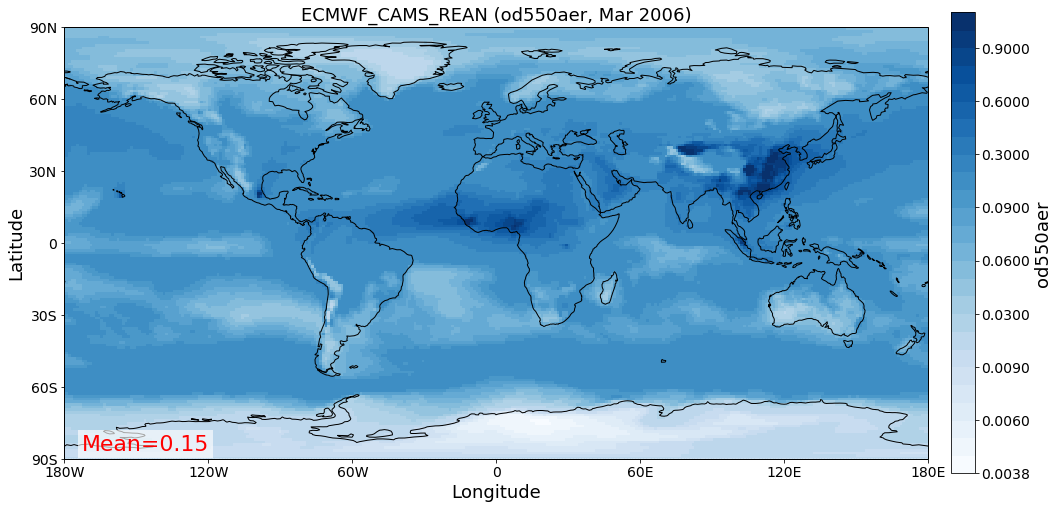

In [8]:
ax = od550aer.quickplot_map(time_idx='Mar 2006')

#### Interactive map plotting

In [9]:
from ipywidgets import interact, fixed
interact(od550aer.quickplot_map, time_idx=(0, 59), xlim=fixed((-180, 180)), 
         ylim=fixed((-90, 90)), vmin=(0, 0.5), vmax=(0.5, 1.5), log_scale=fixed(True),
         add_zero=True)

interactive(children=(IntSlider(value=0, description='time_idx', max=59), Checkbox(value=True, description='ad…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>